## High resolution simulations, 1d output
Exploring the 1-day output files generated by the Salish Sea Atlantis Model
for Scrubber Discharge Project

- scenario 1: 1-year discharge for Jan - Dec 2019
- scenario 2: 5-year discharge for Jan 2019 - Dec 2023
- scenario 3: 10-year discharge for Jan 2019 - Dec 2028

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Loading scenario files

In [85]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_2019_highres_control/outputSalishSea.nc"
scenario1_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_2019_highres/outputSalishSea.nc"
scenario2_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_2019_highres/outputSalishSea.nc"
scenario3_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Scrubber_discharge_2019_highres/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario1 = xr.open_dataset(str(scenario1_file), decode_cf=True)
scenario2 = xr.open_dataset(str(scenario2_file), decode_cf=True)
scenario3 = xr.open_dataset(str(scenario3_file), decode_cf=True)

t = np.ma.filled(scenario1.variables['t'], np.nan)
t.size

31

In [15]:
start = 0
end = t.size-1

# start = 100
# end = 120

time = t[start:end]
event_start = np.datetime64('2019-10-05')

Testing time of phenanthrene discharge in the model

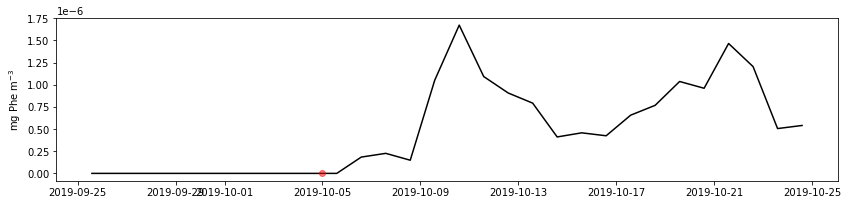

In [16]:
Phe = np.ma.filled(scenario1.variables['Phenanthrene'], np.nan)
Phe = Phe.sum(axis=2)
Phe = Phe.sum(axis=1)

fig, ax = plt.subplots(figsize = (14,3))
ax.plot(time, Phe[start:end], 'k')
ax.plot(event_start, 0, 'ro', alpha=0.5)
ax.set_ylabel('mg Phe m$^{-3}$');

### Compare output across entire model and groups

In [58]:
y_min = 0.999
y_max = 1.001

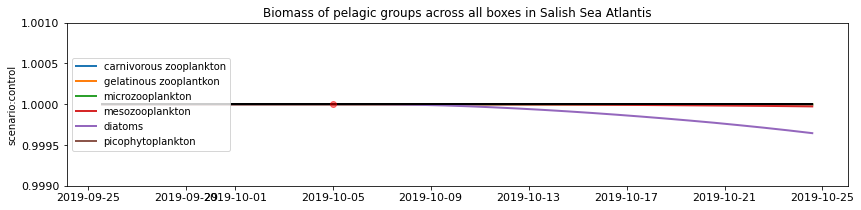

In [59]:
plot_pelagic(groups.plankton,scenario1)

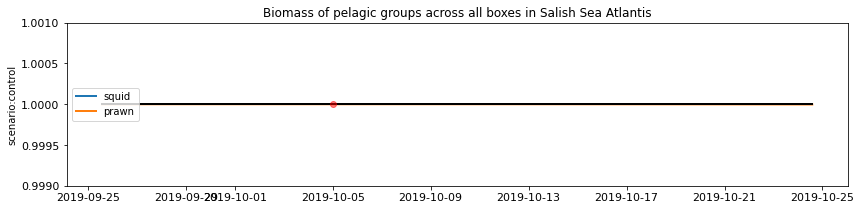

In [60]:
plot_pelagic(groups.pelagic_invertebrates, scenario1) 

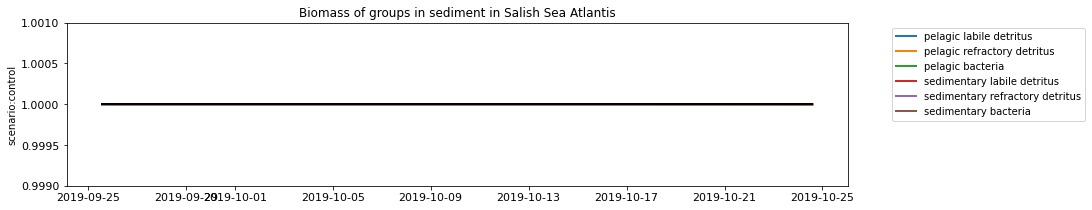

In [61]:
plot_bacteria(scenario1) 

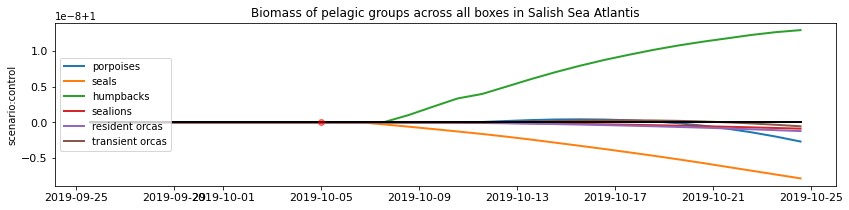

In [11]:
plot_pelagic(groups.mammals, scenario1) ## old run

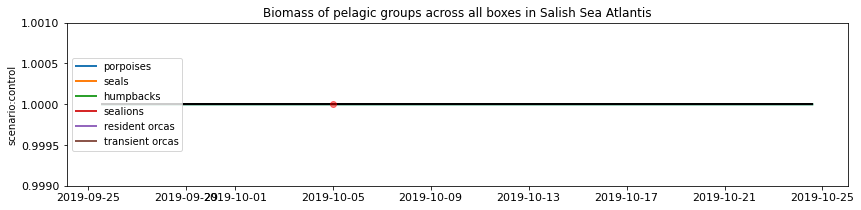

In [62]:
plot_pelagic(groups.mammals, scenario1) ## corrected run

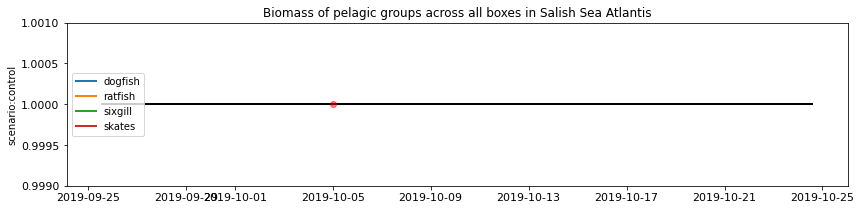

In [63]:
plot_pelagic(groups.sharks, scenario1) ## old run

### BOX 66 - Saanich Inlet

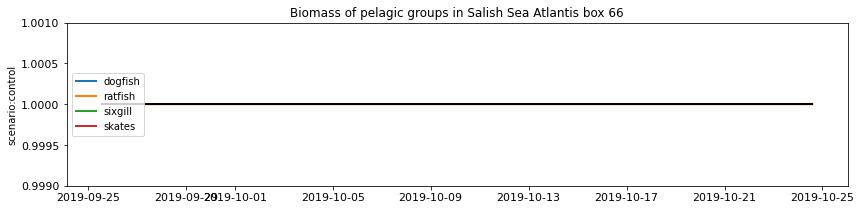

In [64]:
plot_pelagic_box(groups.sharks, scenario1, 66)

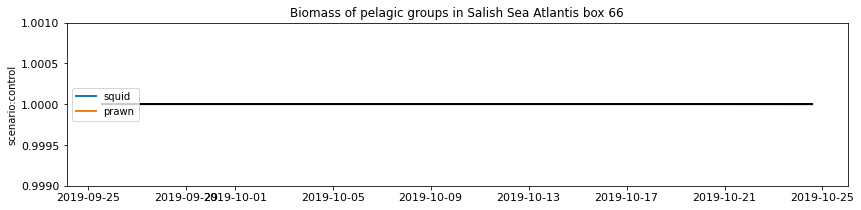

In [65]:
plot_pelagic_box(groups.pelagic_invertebrates, scenario1, 66)

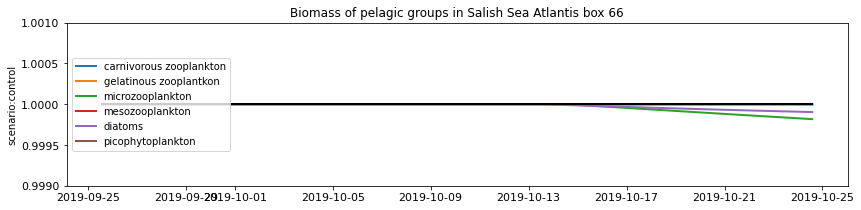

In [66]:
plot_pelagic_box(groups.plankton, scenario1, 66)

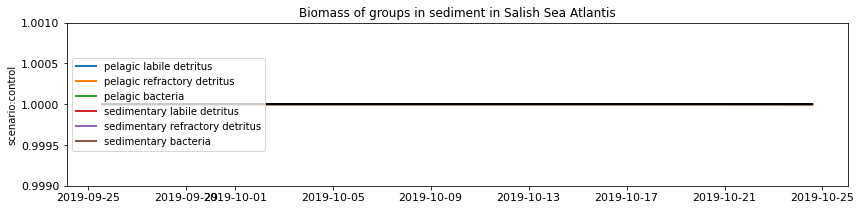

In [67]:
plot_bacteria_box(scenario1, 66)

### Changes at the spill time, 10, and 20 days after

In [70]:
t[30]

numpy.datetime64('2019-10-25T14:00:00.000000000')

In [145]:
# at spill time = 2019-10-05 t[10], 10 days later = 2019-10-15 t[20], 20 days later = 2019-10-25 t[30]

days = (10, 20, 30)
group = groups.plankton
day_dataAggregate = pd.DataFrame({'At_time_of_spill': [],
                    '10_days_after': [],
                    '20_days_after': []},)

def boxplot_pelagic(group, scenario, days, df): #bacteria, plankton

    spp = []

    for species in group:
        results = list()
        for day in days:
            p_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][day,:,0:5], np.nan) # tonnes, take only water column layers
            p_control = np.ma.filled(control.variables[group[species] + '_N'][day,:,0:5], np.nan)
            p_oiled = p_oiled.sum(axis=1)
            p_oiled = p_oiled.sum(axis=0)
            p_control = p_control.sum(axis=1)
            p_control = p_control.sum(axis=0)
            ratio = (p_oiled/p_control-1)*100
            results.append(ratio)
        spp.append(group[species])
        df.loc[len(df.index)] = results
    df['bio_group'] = spp
    df1 = df.set_index('bio_group')
    fig, ax = plt.subplots(figsize=(15, 6))
    df1.plot.bar(ax=ax)  
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # to place the legend outside
    plt.ylabel('Percent (%) change', fontsize=12)
    plt.title('Results of simulation', fontsize=14);


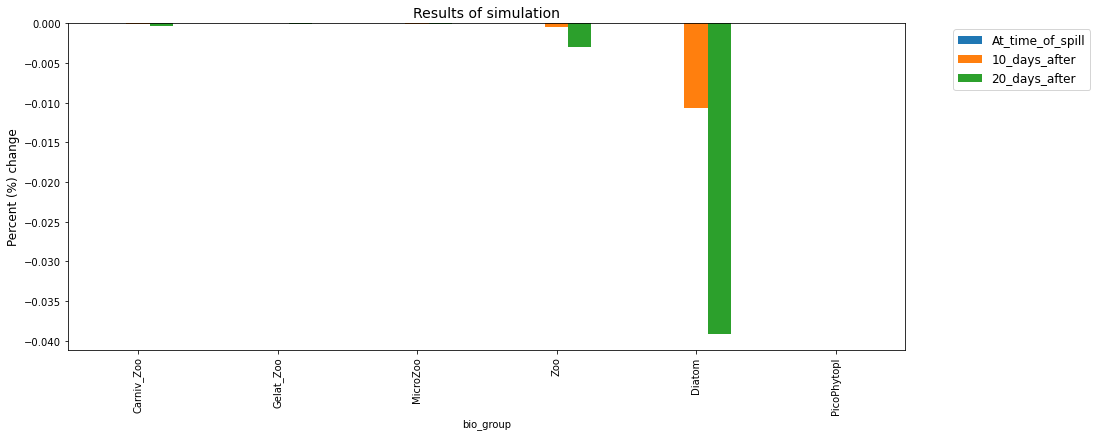

In [146]:
days = (10, 20, 30)
boxplot_pelagic(groups.plankton, scenario1, days, day_dataAggregate)

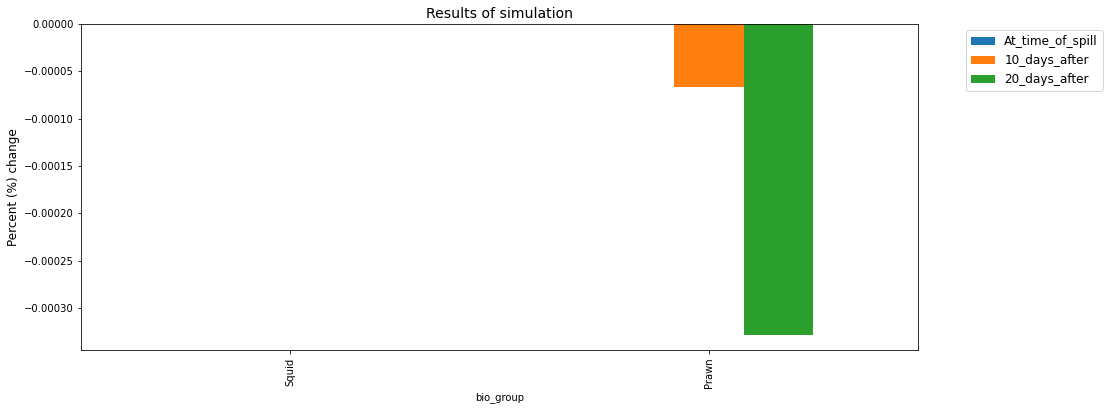

In [148]:
boxplot_pelagic(groups.pelagic_invertebrates, scenario1, days)

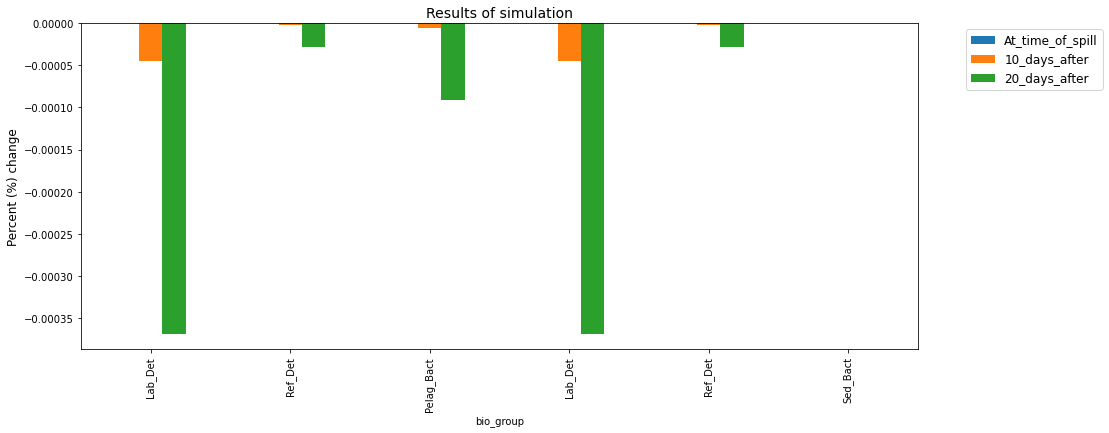

In [149]:
boxplot_pelagic(groups.bacteria, scenario1, days)

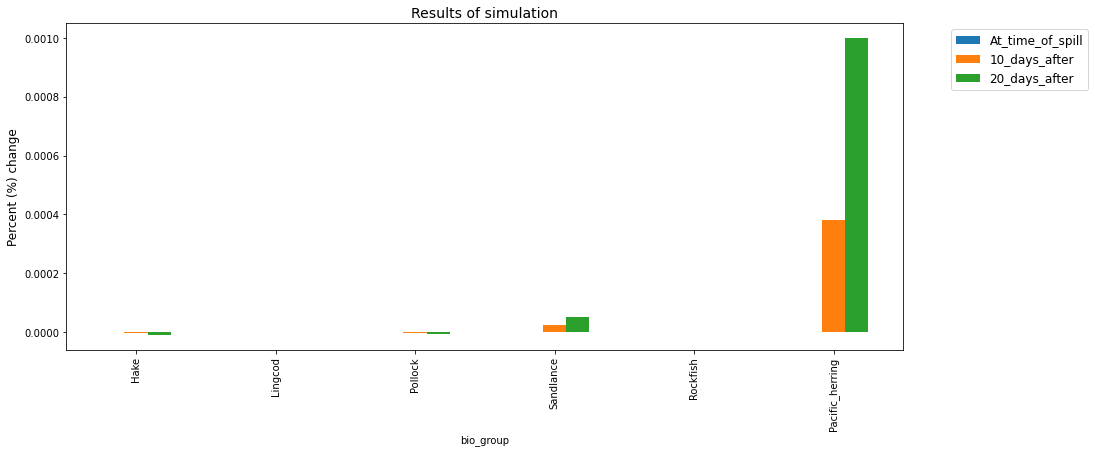

In [150]:
boxplot_pelagic(groups.named_fish, scenario1, days)

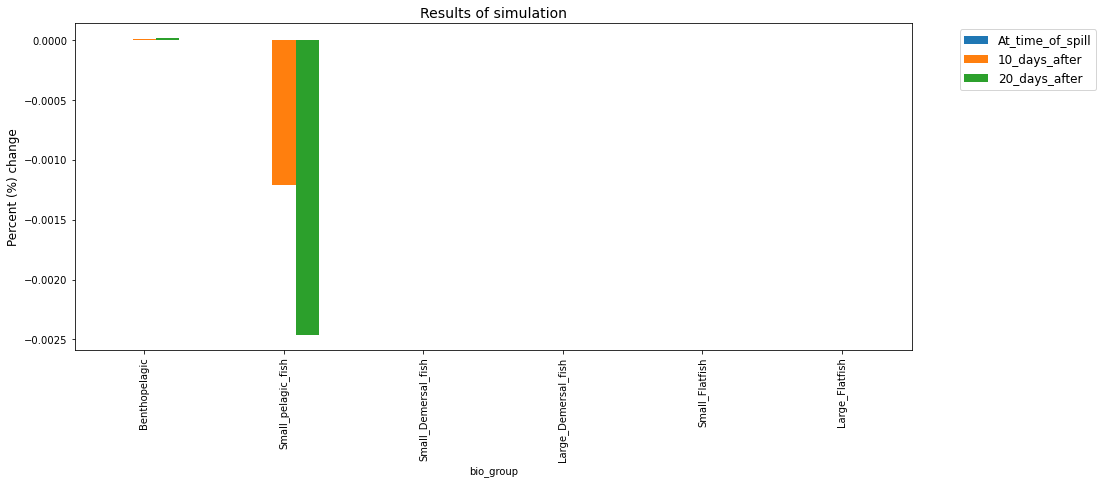

In [151]:
boxplot_pelagic(groups.other_fish, scenario1, days)

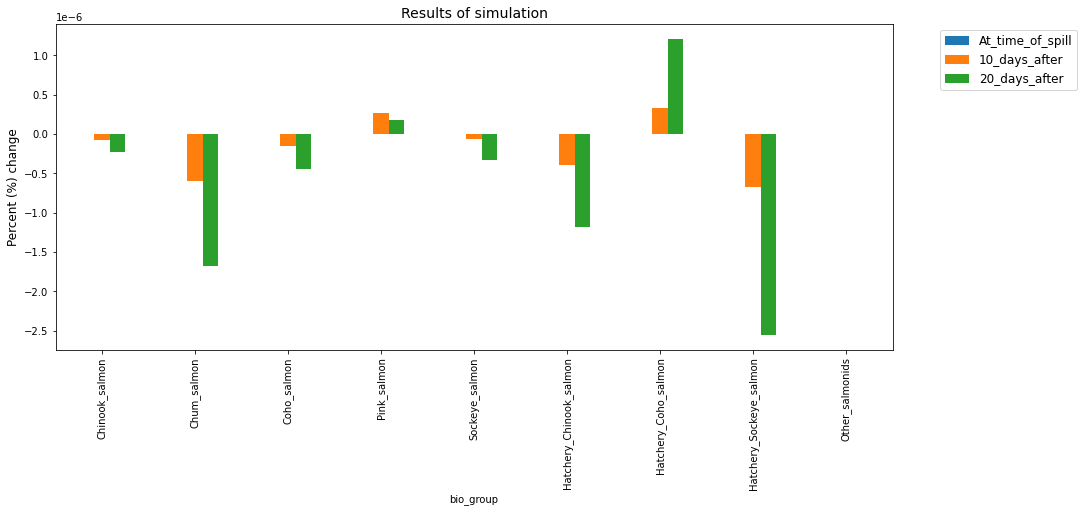

In [152]:
boxplot_pelagic(groups.salmon, scenario1, days)

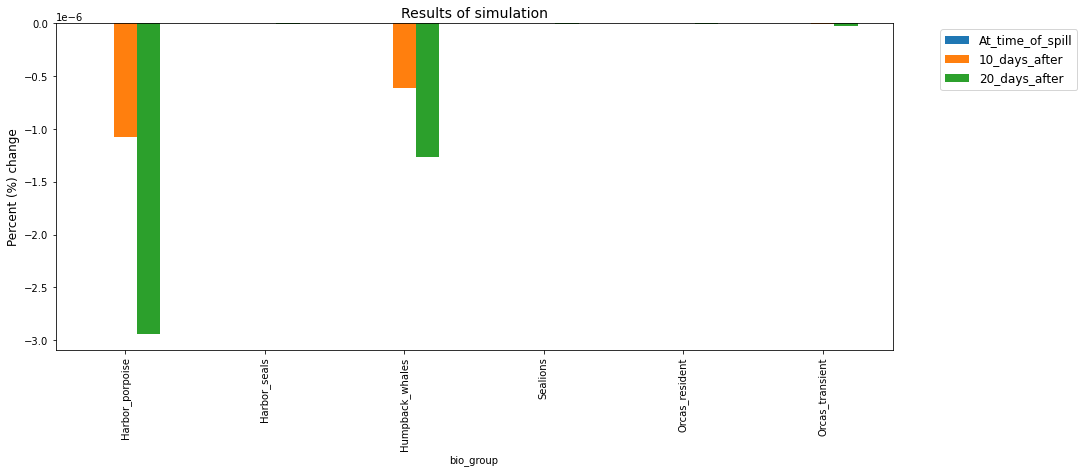

In [153]:
boxplot_pelagic(groups.mammals, scenario1, days)